## Requirement 1 - Collection of real-world data

In [19]:
# Libraries
import os
import json
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# API credentials for Kaggle
with open('kaggle.json') as f:
    data = json.load(f)

os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

from kaggle.api.kaggle_api_extended import KaggleApi

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())


# Initialize API
api = KaggleApi()
api.authenticate()

# Download file
api.dataset_download_file('iamsouravbanerjee/world-population-dataset','world_population.csv')

# Read data to pandas data frame
df = pd.read_csv('world_population.csv', sep=',')

print("World Population Dataframe:")
print(df.to_string())




c:\Users\senth\Scientific Programming\projectwork_SP_FS2024_group_05
World Population Dataframe:
     Rank CCA3                 Country/Territory              Capital      Continent  2022 Population  2020 Population  2015 Population  2010 Population  2000 Population  1990 Population  1980 Population  1970 Population  Area (km²)  Density (per km²)  Growth Rate  World Population Percentage
0      36  AFG                       Afghanistan                Kabul           Asia         41128771         38972230         33753499         28189672         19542982         10694796         12486631         10752971      652230            63.0587       1.0257                         0.52
1     138  ALB                           Albania               Tirana         Europe          2842321          2866849          2882481          2913399          3182021          3295066          2941651          2324731       28748            98.8702       0.9957                         0.04
2      34  DZA       

## Requirement 2 - Data preparation (e.g. strings to numerical using regular expressions)

In [2]:
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].astype('string')

print(df.dtypes)

df['Density (per km²)'] = df['Density (per km²)'].round(2)
df['Growth Rate'] = df['Growth Rate'].round(2)

print("\nDataFrame with rounded columns:")
print(df[['Density (per km²)', 'Growth Rate']].head())

print(df.to_string())

Rank                                    int64
CCA3                           string[python]
Country/Territory              string[python]
Capital                        string[python]
Continent                      string[python]
2022 Population                         int64
2020 Population                         int64
2015 Population                         int64
2010 Population                         int64
2000 Population                         int64
1990 Population                         int64
1980 Population                         int64
1970 Population                         int64
Area (km²)                              int64
Density (per km²)                     float64
Growth Rate                           float64
World Population Percentage           float64
dtype: object

DataFrame with rounded columns:
   Density (per km²)  Growth Rate
0              63.06         1.03
1              98.87         1.00
2              18.85         1.02
3             222.48         0.98
4

## Requirement 3 - Use of Python built-in data structures (lists, dictionaries, sets, tuples) and pandas data frames

In [3]:
# Extract specific columns into lists
countries = df['Country/Territory'].tolist()
populations = df['2022 Population'].tolist()

# Create a dictionary from a subset of the data
country_population_dict = dict(zip(countries, populations))

print(country_population_dict)

{'Afghanistan': 41128771, 'Albania': 2842321, 'Algeria': 44903225, 'American Samoa': 44273, 'Andorra': 79824, 'Angola': 35588987, 'Anguilla': 15857, 'Antigua and Barbuda': 93763, 'Argentina': 45510318, 'Armenia': 2780469, 'Aruba': 106445, 'Australia': 26177413, 'Austria': 8939617, 'Azerbaijan': 10358074, 'Bahamas': 409984, 'Bahrain': 1472233, 'Bangladesh': 171186372, 'Barbados': 281635, 'Belarus': 9534954, 'Belgium': 11655930, 'Belize': 405272, 'Benin': 13352864, 'Bermuda': 64184, 'Bhutan': 782455, 'Bolivia': 12224110, 'Bosnia and Herzegovina': 3233526, 'Botswana': 2630296, 'Brazil': 215313498, 'British Virgin Islands': 31305, 'Brunei': 449002, 'Bulgaria': 6781953, 'Burkina Faso': 22673762, 'Burundi': 12889576, 'Cambodia': 16767842, 'Cameroon': 27914536, 'Canada': 38454327, 'Cape Verde': 593149, 'Cayman Islands': 68706, 'Central African Republic': 5579144, 'Chad': 17723315, 'Chile': 19603733, 'China': 1425887337, 'Colombia': 51874024, 'Comoros': 836774, 'Cook Islands': 17011, 'Costa Ri

In [4]:
# Use sets to find unique values
continents = set(df['Continent'])

# Utilize tuples for specific operations
country_population_tuples = list(zip(countries, populations))

print(country_population_tuples)

[('Afghanistan', 41128771), ('Albania', 2842321), ('Algeria', 44903225), ('American Samoa', 44273), ('Andorra', 79824), ('Angola', 35588987), ('Anguilla', 15857), ('Antigua and Barbuda', 93763), ('Argentina', 45510318), ('Armenia', 2780469), ('Aruba', 106445), ('Australia', 26177413), ('Austria', 8939617), ('Azerbaijan', 10358074), ('Bahamas', 409984), ('Bahrain', 1472233), ('Bangladesh', 171186372), ('Barbados', 281635), ('Belarus', 9534954), ('Belgium', 11655930), ('Belize', 405272), ('Benin', 13352864), ('Bermuda', 64184), ('Bhutan', 782455), ('Bolivia', 12224110), ('Bosnia and Herzegovina', 3233526), ('Botswana', 2630296), ('Brazil', 215313498), ('British Virgin Islands', 31305), ('Brunei', 449002), ('Bulgaria', 6781953), ('Burkina Faso', 22673762), ('Burundi', 12889576), ('Cambodia', 16767842), ('Cameroon', 27914536), ('Canada', 38454327), ('Cape Verde', 593149), ('Cayman Islands', 68706), ('Central African Republic', 5579144), ('Chad', 17723315), ('Chile', 19603733), ('China', 14

In [5]:
country_population_tuples = list(zip(countries, populations))

# Displaying the extracted lists, dictionary, set, and tuples
print("\nList of countries:")
print(countries[:10])  # Display first 10 countries for brevity

print("\nList of populations:")
print(populations[:10])  # Display first 10 populations for brevity

print("\nDictionary of country and population:")
print(list(country_population_dict.items())[:10])  # Display first 10 items for brevity


List of countries:
['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia']

List of populations:
[41128771, 2842321, 44903225, 44273, 79824, 35588987, 15857, 93763, 45510318, 2780469]

Dictionary of country and population:
[('Afghanistan', 41128771), ('Albania', 2842321), ('Algeria', 44903225), ('American Samoa', 44273), ('Andorra', 79824), ('Angola', 35588987), ('Anguilla', 15857), ('Antigua and Barbuda', 93763), ('Argentina', 45510318), ('Armenia', 2780469)]


In [6]:
print("\nSet of unique continents:")
print(continents)


Set of unique continents:
{'Africa', 'North America', 'South America', 'Oceania', 'Europe', 'Asia'}


In [7]:

print("\nList of tuples (country, population):")
print(country_population_tuples[:10])  # Display first 10 tuples for brevity


List of tuples (country, population):
[('Afghanistan', 41128771), ('Albania', 2842321), ('Algeria', 44903225), ('American Samoa', 44273), ('Andorra', 79824), ('Angola', 35588987), ('Anguilla', 15857), ('Antigua and Barbuda', 93763), ('Argentina', 45510318), ('Armenia', 2780469)]


## Requirement 4 - Use of conditional statements, loop control statements and loops

In [16]:
class PopulationData:
    def __init__(self, dataframe):
        self.df = dataframe

    def categorize_population(self, population):
        if population < 1_000_000:
            return 'Small'
        elif population < 10_000_000:
            return 'Medium'
        else:
            return 'Large'

    def add_population_category(self):
        self.df['Population Category'] = self.df['2022 Population'].apply(self.categorize_population)

    def calculate_continent_summary(self):
        self.continent_population_summary = {}
        for continent in self.df['Continent'].unique():
            continent_data = self.df[self.df['Continent'] == continent]
            total_population = continent_data['2022 Population'].sum()
            average_population = int(np.ceil(continent_data['2022 Population'].mean()))  # Round up and convert to int
            self.continent_population_summary[continent] = {
                'Total Population': total_population,
                'Average Population': average_population
            }

    def get_continent_summary(self):
        return self.continent_population_summary

    def filter_countries_by_population(self, threshold):
        filtered_countries = []
        for index, row in self.df.iterrows():
            if row['2022 Population'] > threshold:
                filtered_countries.append(row['Country/Territory'])
        return filtered_countries

# Usage example:

# Step 1: Initialize the PopulationData class with the DataFrame
population_data = PopulationData(df)

# Step 2: Add population category
population_data.add_population_category()

# Step 3: Print the DataFrame to see the output
print("\nDataFrame with Population Category:")
print(population_data.df[['Country/Territory', '2022 Population', 'Population Category']].head())

# Step 4: Calculate and print continent population summary
population_data.calculate_continent_summary()
continent_summary = population_data.get_continent_summary()
print("\nContinent Population Summary:")
for continent, summary in continent_summary.items():
    print(f"{continent}: Total Population = {summary['Total Population']}, Average Population = {summary['Average Population']}")

# Step 5: Filter countries by population threshold and print them
population_threshold = 5_000_000
filtered_countries = population_data.filter_countries_by_population(population_threshold)
print(f"\nCountries with population greater than {population_threshold}:")
print(filtered_countries)



DataFrame with Population Category:
  Country/Territory  2022 Population Population Category
0       Afghanistan         41128771               Large
1           Albania          2842321              Medium
2           Algeria         44903225               Large
3    American Samoa            44273               Small
4           Andorra            79824               Small

Continent Population Summary:
Asia: Total Population = 4721383274, Average Population = 94427666
Europe: Total Population = 743147538, Average Population = 14862951
Africa: Total Population = 1426730932, Average Population = 25030368
Oceania: Total Population = 45038554, Average Population = 1958198
North America: Total Population = 600296136, Average Population = 15007404
South America: Total Population = 436816608, Average Population = 31201187

Countries with population greater than 5000000:
['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgiu

## Requirement 6 - Use of tables, vizualizations/graphics for data exploration


Continent Population Summary Table:
+---------------+------------------+--------------------+
|   Continent   | Total Population | Average Population |
+---------------+------------------+--------------------+
|     Asia      |    4721383274    |      94427666      |
|    Europe     |    743147538     |      14862951      |
|    Africa     |    1426730932    |      25030368      |
|    Oceania    |     45038554     |      1958198       |
| North America |    600296136     |      15007404      |
| South America |    436816608     |      31201187      |
+---------------+------------------+--------------------+


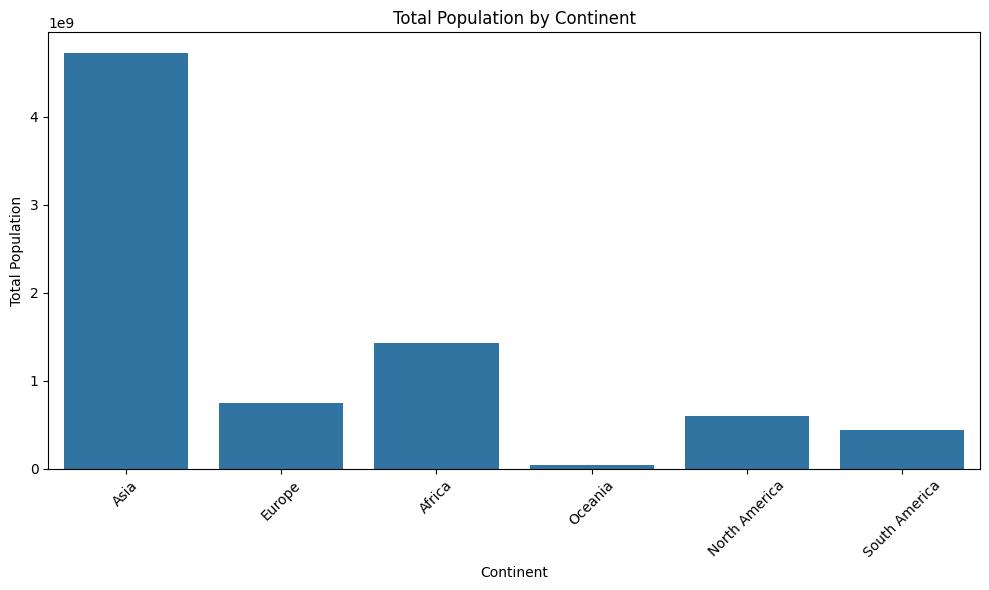

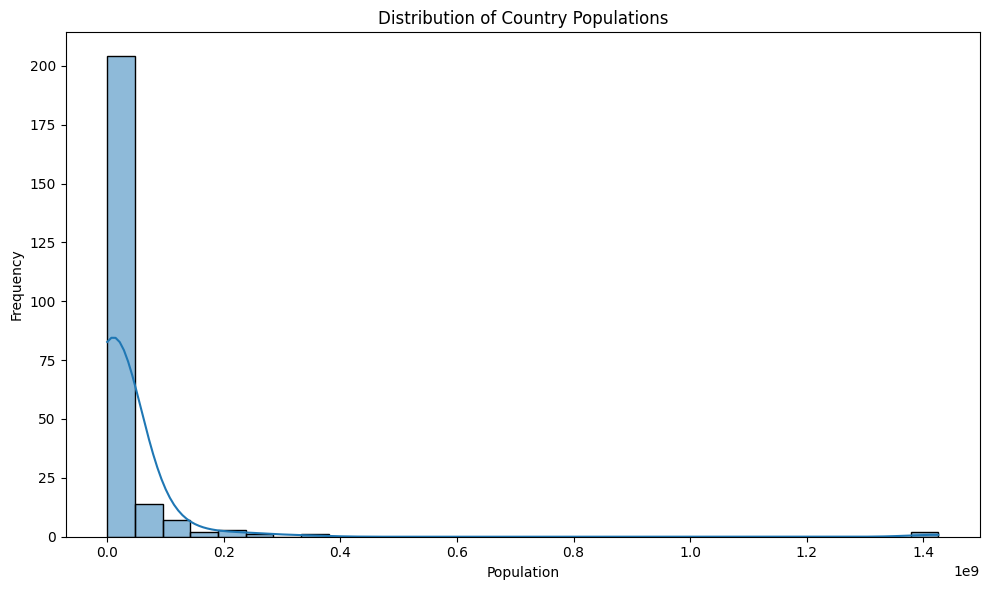

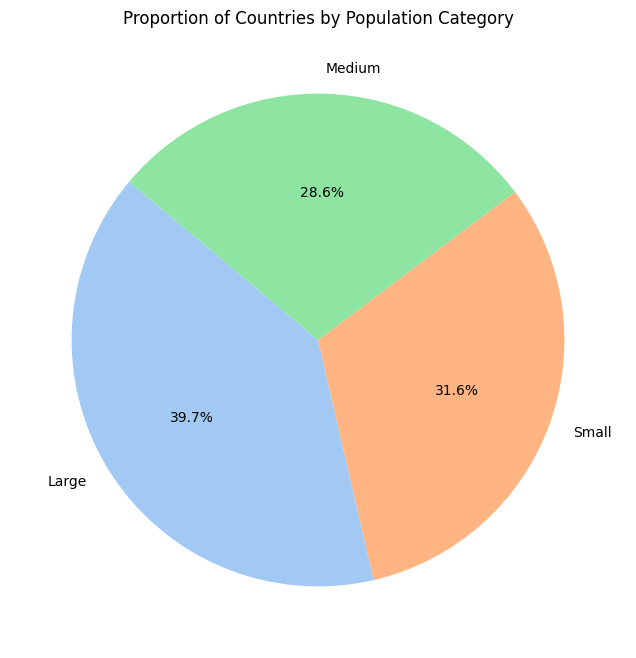

In [17]:
# Step 1: Initialize the PopulationData class with the DataFrame
population_data = PopulationData(df)

# Step 2: Add population category
population_data.add_population_category()

# Step 3: Calculate continent population summary
population_data.calculate_continent_summary()
continent_summary = population_data.get_continent_summary()

# Step 4: Display continent summary as a table
table = [[continent, summary['Total Population'], summary['Average Population']] for continent, summary in continent_summary.items()]
print("\nContinent Population Summary Table:")
print(tabulate(table, headers=['Continent', 'Total Population', 'Average Population'], tablefmt='pretty'))

# Step 5: Bar plot of total population by continent
continent_df = pd.DataFrame(continent_summary).T.reset_index().rename(columns={'index': 'Continent'})
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_df, x='Continent', y='Total Population')
plt.title('Total Population by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Histogram of country populations
plt.figure(figsize=(10, 6))
sns.histplot(df['2022 Population'], bins=30, kde=True)
plt.title('Distribution of Country Populations')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 7: Pie chart of population categories
category_counts = df['Population Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Proportion of Countries by Population Category')
plt.show()

## Requirement 7 - Integration of a statistical analyses (e.g. correlation analysis, statistical test); must contain a p-value.


Correlation Analysis with '2022 Population':
Density (per km²):
  Correlation Coefficient: -0.0276
  P-value: 6.7427e-01
Growth Rate:
  Correlation Coefficient: -0.0209
  P-value: 7.5088e-01


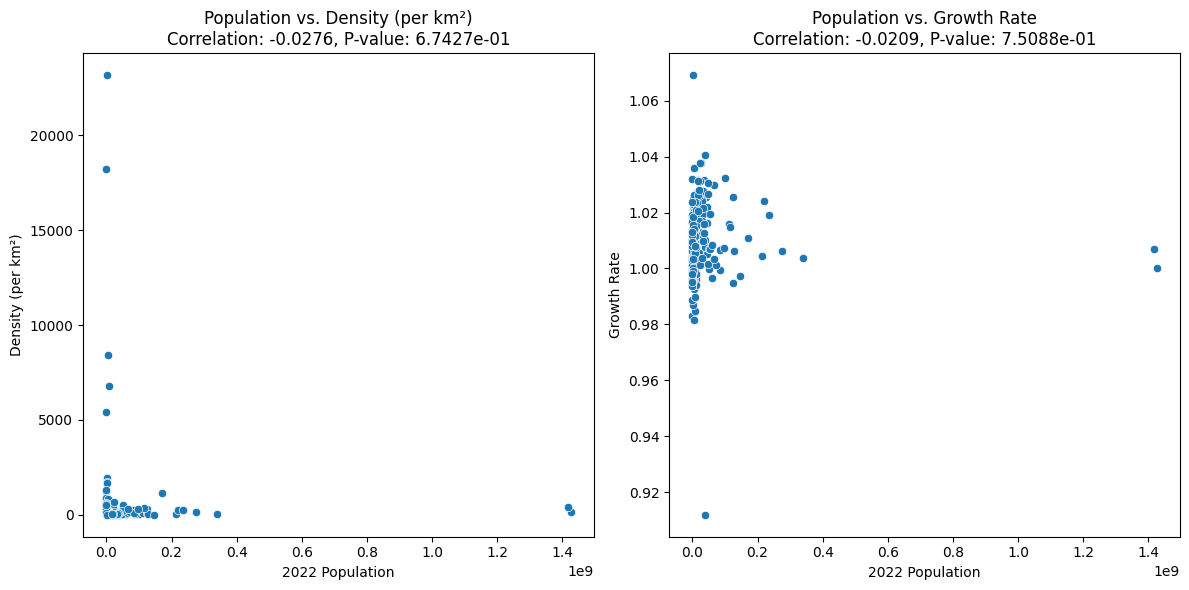

In [20]:
# Select numerical columns for correlation analysis
numerical_columns = ['2022 Population', 'Density (per km²)', 'Growth Rate']

# Calculate correlation coefficients and p-values
correlation_results = {}
for col in numerical_columns:
    if col != '2022 Population':
        corr, p_value = pearsonr(df['2022 Population'], df[col])
        correlation_results[col] = {'Correlation Coefficient': corr, 'P-value': p_value}

# Display the correlation results
print("\nCorrelation Analysis with '2022 Population':")
for col, results in correlation_results.items():
    print(f"{col}:")
    print(f"  Correlation Coefficient: {results['Correlation Coefficient']:.4f}")
    print(f"  P-value: {results['P-value']:.4e}")

# Visualization of correlation
plt.figure(figsize=(12, 6))

# Scatter plot for '2022 Population' vs 'Density (per km²)'
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['2022 Population'], y=df['Density (per km²)'])
plt.title(f"Population vs. Density (per km²)\nCorrelation: {correlation_results['Density (per km²)']['Correlation Coefficient']:.4f}, P-value: {correlation_results['Density (per km²)']['P-value']:.4e}")
plt.xlabel('2022 Population')
plt.ylabel('Density (per km²)')

# Scatter plot for '2022 Population' vs 'Growth Rate'
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['2022 Population'], y=df['Growth Rate'])
plt.title(f"Population vs. Growth Rate\nCorrelation: {correlation_results['Growth Rate']['Correlation Coefficient']:.4f}, P-value: {correlation_results['Growth Rate']['P-value']:.4e}")
plt.xlabel('2022 Population')
plt.ylabel('Growth Rate')

plt.tight_layout()
plt.show()